# Plotting

## `matplotlib` is the most widely used scientific plotting library in Python.

- Commonly use a sub-library called matplotlib.pyplot.
- The Jupyter Notebook will render plots inline if we ask it to using a “magic” command.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

- Simple plots are then (fairly) simple to create.

Text(0, 0.5, 'Position (km)')

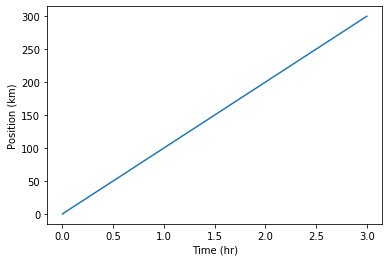

In [2]:
time = [0, 1, 2, 3]
position = [0, 100, 200, 300]

plt.plot(time, position)
plt.xlabel('Time (hr)')
plt.ylabel('Position (km)')

    In our Jupyter Notebook example with %matplotlib inline, running the cell generates the figure directly below the code. The figure is also included in the Notebook document for future viewing. However, other Python environments require an additional command in order to display the figure.

    Instruct matplotlib to show a figure:
    
`plt.show()`

## A Gapminder example

In [8]:
import plotly.express as px
import pandas as pd

In [5]:
data = px.data.gapminder()

In [81]:
data.head(10)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
5,Afghanistan,Asia,1977,38.438,14880372,786.113360,AFG,4
6,Afghanistan,Asia,1982,39.854,12881816,978.011439,AFG,4
7,Afghanistan,Asia,1987,40.822,13867957,852.395945,AFG,4
8,Afghanistan,Asia,1992,41.674,16317921,649.341395,AFG,4
9,Afghanistan,Asia,1997,41.763,22227415,635.341351,AFG,4


In [80]:
data.to_csv('gapminder.csv')

In [15]:
data_ned = data[data['country'] == 'Netherlands']

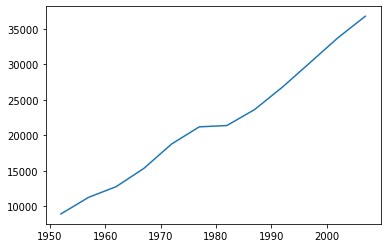

In [16]:
plt.plot(data_ned['year'], data_ned['gdpPercap'])

## Can plot many sets of data together.

In [42]:
# Select two countries' worth of data.
data_ger = data[data['country'] == 'Germany']
data_mex = data[data['country'] == 'Mexico']

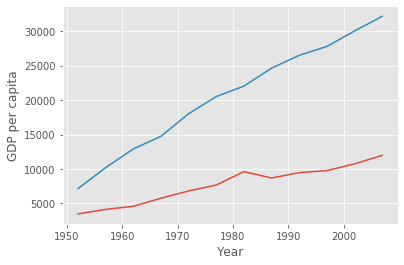

In [43]:
plt.plot(data_mex['year'], data_mex['gdpPercap'])
plt.plot(data_ger['year'], data_ger['gdpPercap'])
plt.xlabel('Year')
plt.ylabel('GDP per capita')
plt.show()

## Many styles of plot are available.

Often when plotting multiple datasets on the same figure it is desirable to have a legend describing the data.

This can be done in `matplotlib` in two stages:

- Provide a **label** for each dataset in the figure:
- Instruct matplotlib to create the **legend**.

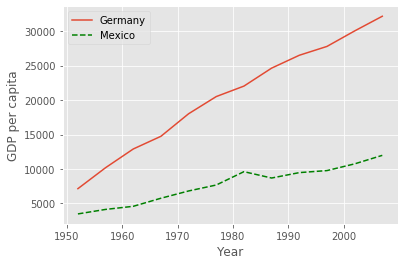

In [49]:
plt.style.use('ggplot')
plt.plot(data_ger['year'], data_ger['gdpPercap'], label ='Germany', )
plt.plot(data_mex['year'], data_mex['gdpPercap'], label ='Mexico', linestyle = "--", color = "green")
plt.xlabel('Year')
plt.ylabel('GDP per capita')
plt.legend(loc='upper left')
plt.show()


## Playing around with intervals and exploring pandas tricks

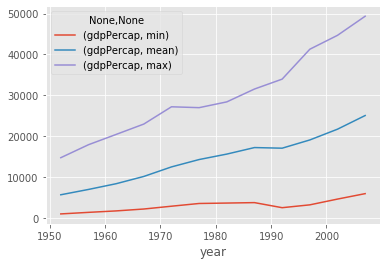

In [65]:
data\
    [data['continent'] == 'Europe']\
    [['year','gdpPercap']]\
    .groupby('year')\
    .agg(["min","mean","max"])\
    .plot()

## Scatter plots to see correlations

Take a deeper look at the axis, they are no longer a time series.

Modify the example in the notes to create a scatter plot showing the relationship between the minimum and maximum GDP per capita among the countries in Asia for each year in the data set. What relationship do you see (if any)?

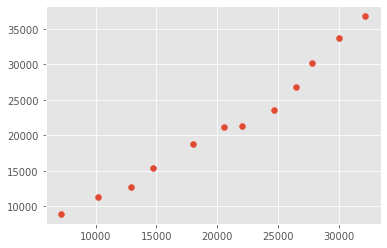

In [50]:
plt.scatter(data_ger['gdpPercap'], data_ned['gdpPercap'])

Add the necessary labels  
Comment on the trend

## Analysing other variables 

Let's make a cut now by year and plot the continous variables

In [67]:
data_2007 = data[data['year'] == 2007]

In [69]:
data_2007.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap',
       'iso_alpha', 'iso_num'],
      dtype='object')

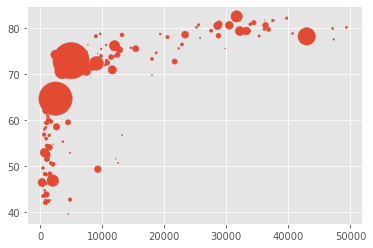

In [74]:
plt.scatter(x = data_2007['gdpPercap'], 
            y = data_2007['lifeExp'], 
            s = data_2007['pop']/1e6)

A good place to look is the documentation for the plot function `plt.scatter?`. 
x and y - A column name or index that determines what data will be placed on the x and y axes of the plot

s - Details for this can be found in the documentation of plt.scatter. A single number or one value for each data point. Determines the size of the plotted points.

## Saving your plot to a file

If you are satisfied with the plot you see you may want to save it to a file, perhaps to include it in a publication. There is a function in the matplotlib.pyplot module that accomplishes this: savefig. Calling this function, e.g. with
`plt.savefig('my_figure.png')`

## Making your plots accessible

Whenever you are generating plots to go into a paper or a presentation, there are a few things you can do to make sure that everyone can understand your plots.

- Always make sure your text is large enough to read. Use the fontsize parameter in xlabel, ylabel, title, and legend, and tick_params with labelsize to increase the text size of the numbers on your axes.
- Similarly, you should make your graph elements easy to see. Use s to increase the size of your scatterplot markers and linewidth to increase the sizes of your plot lines.
- Using color (and nothing else) to distinguish between different plot elements will make your plots unreadable to anyone who is colorblind, or who happens to have a black-and-white office printer. For lines, the linestyle parameter lets you use different types of lines. For scatterplots, marker lets you change the shape of your points. If you’re unsure about your colors, you can use Coblis or Color Oracle to simulate what your plots would look like to those with colorblindness.

## Plotly Express

In [77]:
px.scatter(data_2007, x="gdpPercap", y="lifeExp", color="continent", size="pop", size_max=50)

In [78]:
px.bar(data_ned, x='year', y='pop')

## Even animated!

In [76]:
px.scatter(data, 
           x="gdpPercap", 
           y="lifeExp",
           size="pop", size_max=60, 
           color="continent", hover_name="country",
           animation_frame="year", 
           animation_group="country", log_x=True, range_x=[100,100000], range_y=[25,90],
           labels=dict(pop="Population", gdpPercap="GDP per Capita", lifeExp="Life Expectancy"))